### Лабораторная работа №5: Деревья решений

#### Шутько Вадим Валерьевич

### Используется Bank Marketing Dataset

https://www.kaggle.com/janiobachmann/bank-marketing-dataset

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

Columns: age

job

marital

education

default

balance

housing

loan

contact

day

month

duration

campaign

pdays

previous

poutcome

deposit

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  recall_score,precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("bank-full.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Предобработка данных

In [4]:
num = [v for v in df.columns if  df[v].dtype=='int64' or df[v].dtype=='int32' ]
cat = list(set(df.columns)-set(num))
cat.remove("y")

In [7]:
df['y'] = LabelEncoder().fit_transform(df['y'])
df =  pd.get_dummies(data=df, columns=cat)

In [10]:
df.shape

(45211, 52)

In [11]:
train_col = df.columns.difference(["y"])

### 1.1 StandartScaler and KNN (without pipeline)

In [12]:
scaler = StandardScaler(with_mean=True, with_std=True)
data = scaler.fit_transform(df[train_col])

c:\python 3.7.0\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python 3.7.0\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, df["y"], test_size=0.25)

In [14]:
model_knn = KNeighborsClassifier()
model_knn.fit(Xtrain, Ytrain)
model_knn.score(Xtest, Ytest)

0.8926833584004247

### 1.2 Pipeline

In [43]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

In [57]:
pipe_knn.fit(df[train_col], df["y"])
pipe_knn.score(df[train_col], df["y"])

c:\python 3.7.0\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9175864280816616

### 1.3 GridSearch KNN

In [16]:
from sklearn.model_selection import GridSearchCV

In [21]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(shuffle = True)

c:\python 3.7.0\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [40]:
model = KNeighborsClassifier()
n_neighbors = range(7, 13)
params_knn = {'n_neighbors': n_neighbors}
grid = GridSearchCV(estimator=model, param_grid=params_knn, cv=cv, n_jobs=-1, verbose = True)
grid.fit(data, df['y'])
print(grid.best_score_, grid.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 17.7min finished


0.894052332396983 {'n_neighbors': 12}


In [61]:
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(Xtrain, Ytrain)
model_knn.score(Xtest, Ytest)

0.8916216933557463

### 2.1 Решающее дерево

In [65]:
model = DecisionTreeClassifier()
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)
print(f"Accuracy_score: {accuracy_score(Ytest, pred )}")
print(f"Precision: {precision_score(Ytest, pred )}")
print(f"recall:{recall_score(Ytest, pred )}")
print(f"f1-мера:{f1_score(Ytest, pred )}")

Accuracy_score: 0.8735733875962134
Precision: 0.47556528081692195
recall:0.4787077826725404
f1-мера:0.47713135748261987


### 2.2 GridSearch Решающее дерево

In [29]:
modelDT = DecisionTreeClassifier()
max_depth = [3, 4, 5]
max_leaf_nodes = [2, 3, 4, 5, 6]
min_samples_split = [7,8,9]
criterion = ['gini', 'entropy']
parameters = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'min_samples_split': min_samples_split,
    'criterion': criterion
}

g_search = GridSearchCV(estimator=modelDT, param_grid=parameters, cv=cv)
g_search.fit(data, df["y"])
print('Results:', g_search.best_params_ )
g_search.best_score_

Results: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 7}


0.8938090287761827

### 2.3 График наиболее важных признаков

In [30]:
def plot_feature_importances(model):
    plt.figure(figsize=(20,10))
    n_features = df[train_col].shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_col)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    

In [31]:
best_model = g_search.best_estimator_

In [32]:
best_model.fit(Xtrain,Ytrain)
best_model.score(Xtest, Ytest)

0.8957798814474034

In [33]:
ls = list(zip(train_col, best_model.feature_importances_))
ls.sort(key=lambda i: i[1], reverse=True)
ls[:3]

[('duration', 0.5943128893461855),
 ('poutcome_success', 0.3473748129870231),
 ('housing_no', 0.058312297666791225)]

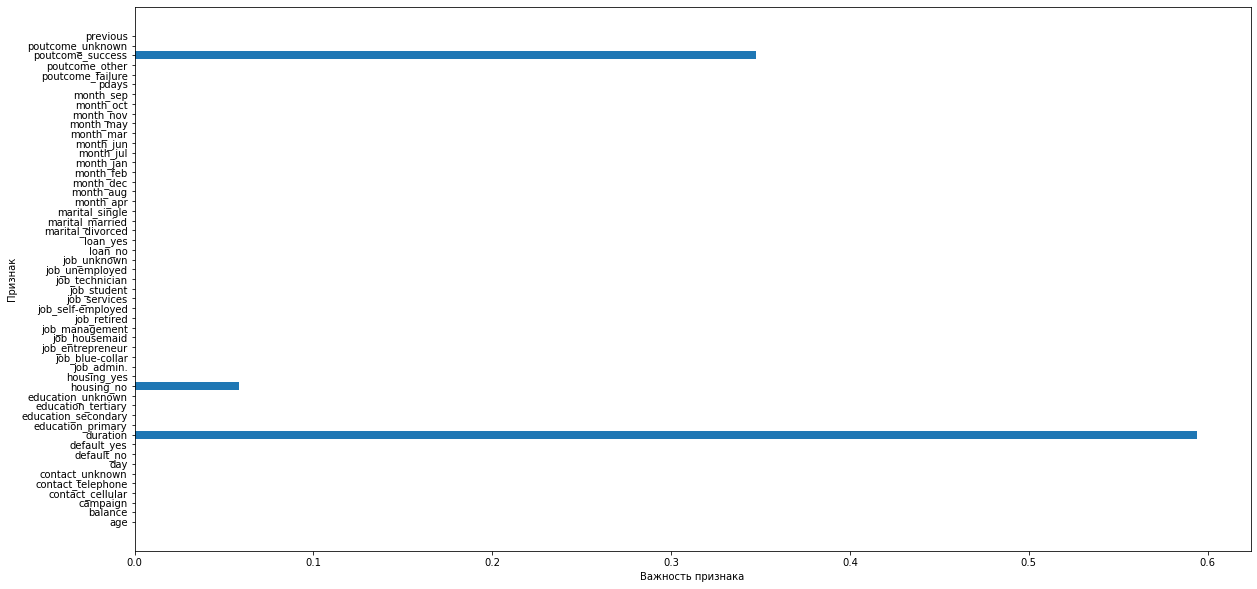

In [34]:
plot_feature_importances(best_model)

### 3.1 Random Forest

In [35]:
 from sklearn.ensemble import RandomForestClassifier

In [45]:
modelRF= RandomForestClassifier()
modelRF.fit(Xtrain, Ytrain)
modelRF.score(Xtest, Ytest)

c:\python 3.7.0\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8987879324073255

In [46]:
pred = modelRF.predict(Xtest
print(classification_report(Ytest, pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9970
           1       0.63      0.35      0.45      1333

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.77      0.66      0.70     11303
weighted avg       0.88      0.90      0.89     11303



### 3.2 GridSearch RF

In [43]:
model_RF= RandomForestClassifier(n_jobs=-1)
params_RF = {
    'max_depth': range(1,17),
    "max_features": ["auto", 'sqrt', 'log2'],
    "criterion": ["gini", "entropy"]

}

grid_RF = GridSearchCV(model_RF, param_grid=params_RF, cv=cv, n_jobs=-1 )
grid_RF.fit(data, df['y'])
print(grid_RF.best_params_, grid_RF.best_score_)

c:\python 3.7.0\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'} 0.902523722103028


In [44]:
best_model_RF = grid_RF.best_estimator_
best_model_RF.fit(Xtrain, Ytrain)
pred_RF = best_model_RF.predict(Xtest)
print(classification_report(Ytest, pred))
#немного возрасла accuracy

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9970
           1       0.62      0.36      0.46      1333

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.77      0.67      0.70     11303
weighted avg       0.88      0.90      0.89     11303



Самый лучший результат (accuracy) на тестовой выборке  показал Random Forest {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}(количество деревьев = 10)